# SVM Letter Recognition - Worksheet 5 and 6

# Importing Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Training dataset

In [30]:
df_train = pd.read_csv(r'Documents\train.csv')

# Testing dataset

In [31]:
df_test = pd.read_csv(r'Documents\test.csv')

# Data Understanding of training dataset

In [32]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_train.shape

(42000, 785)

In [34]:
df_train.isnull().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [35]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Data Understanding of testing data

In [36]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_test.shape

(28000, 784)

In [38]:
df_test.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [39]:
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [40]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [41]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [42]:
order = list(np.sort(df_train['label'].unique()))

In [43]:
order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

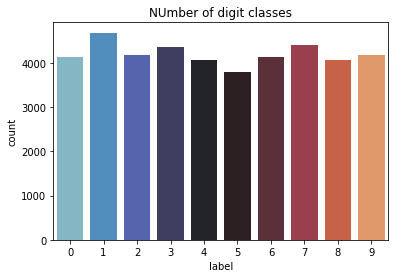

In [44]:
plt.plot(figure = (16,10))
g = sns.countplot(df_train["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
df_train.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

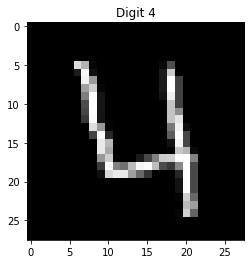

In [45]:
four = df_train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

# Data preparation

In [46]:
round(df_train.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [47]:
X = df_train.drop(['label'], axis = 1)
y = df_train['label']

In [48]:
X.shape

(42000, 784)

In [49]:
y.shape

(42000,)

In [50]:
df_train.shape

(42000, 785)

In [51]:
X = X/255.0
df_test = df_test/255.0

print("X:", X.shape)
print("df_test:", df_test.shape)

X: (42000, 784)
df_test: (28000, 784)


# Train-test split

In [52]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

# Model Building

In [60]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9133333333333333 

[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


The accuracy is coming out to be 91.33% for linear SVM. Now let's check for non-linear SVM.

# Non-linear SVM

In [62]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [63]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9347619047619048 

[[1158    0    5    1    0    3   11    5    4    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1171   19    5    0    9   34   15    1]
 [   1    4   21 1236    0   22    2   30   12    3]
 [   0    5   24    1 1135    0    9   14    3   27]
 [   1    9    4   41    3 1047   17   10    9    8]
 [  12    2    5    0    2   18 1154   24    2    0]
 [   4   11    9    4   16    0    0 1253    1   32]
 [   4   19   13   26    8   23    8   14 1094    8]
 [   3    4    5   30   24    2    1   61    4 1141]]


The non-linear model gives approx. 93.5% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.



In [64]:
param =[ {'C':[10,5],
         'gamma': [1e-2, 1e-3, 1e-4] }]

folds = KFold(n_splits=5 , shuffle= True , random_state=10)

In [65]:
SVMmodel = SVC(kernel='rbf')
Grid_model = GridSearchCV(estimator=SVMmodel, param_grid=param,
                          scoring='accuracy',cv=folds , verbose=1,return_train_score=True,n_jobs=-1)

In [67]:
Grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [10, 5], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [73]:
cv_results = pd.DataFrame(Grid_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,259.864742,5.311166,30.396730,1.088225,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,52.773856,1.648473,16.415112,1.007162,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
2,40.433495,1.434849,14.089729,0.300210,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744
3,258.166673,2.553918,30.433759,0.700779,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,50.921157,1.797808,15.755675,0.330265,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
5,44.449031,4.125039,14.067987,4.169960,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379


In [74]:
best_score = Grid_model.best_score_
best_hyper = Grid_model.best_params_

In [75]:
print(best_score)
print(best_hyper)

0.9448809523809524
{'C': 10, 'gamma': 0.001}


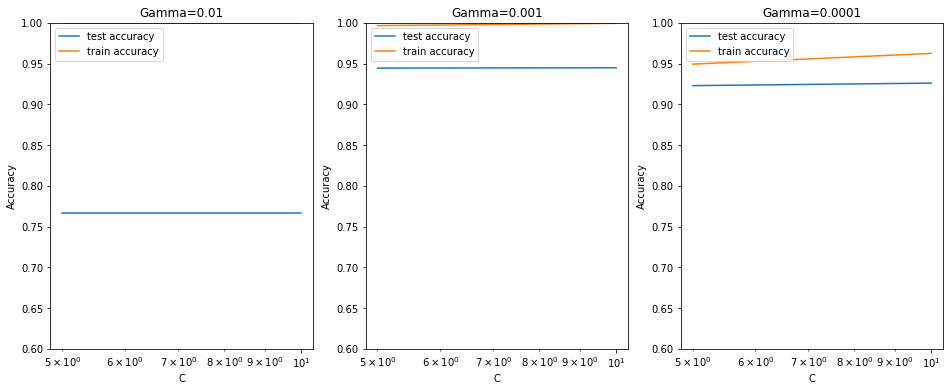

In [76]:
cv_results['param_C'] = cv_results['param_C'].astype('int')
# # plotting
plt.figure(figsize=(16,6))
# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
11
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [79]:
final_model = SVC(kernel='rbf',C=10,gamma=1e-3)

In [81]:
final_model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
y_pred_final = final_model.predict(X_test)

In [84]:
print("Final Accuracy : {} ".format( metrics.accuracy_score(y_test,y_pred_final)))
print(metrics.confusion_matrix(y_test,y_pred_final))

Final Accuracy : 0.9438888888888889 
[[1163    0    4    1    1    2    8    6    3    0]
 [   0 1389    4    2    4    0    1    9    4    0]
 [   1    4 1184   14    5    1    9   30    7    5]
 [   0    3   15 1263    0   14    2   23    8    3]
 [   1    2   20    3 1149    0   10   10    2   21]
 [   2    8    3   30    4 1064   15    9   11    3]
 [   8    1    3    0    3   13 1167   23    1    0]
 [   4    9   10    8   12    0    0 1255    2   30]
 [   5   18   17   23    8   20    5   13 1098   10]
 [   5    3    2   27   21    1    1   51    3 1161]]


The accuracy achieved using a non-linear kernel (~0.95) is mush higher than that of a linear one
(~0.85). We can conclude that the problem is highly non-linear in nature.